In [1]:
import os
from google.cloud import bigquery
import pandas as pd


# ***I commented the following imports out but you will likely need at least some of them at some point***
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# from scipy.stats import norm


# dont forget to replace  with your local username
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/wangshiyu/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Yearly Funds Deployment Situations

In [3]:
df1 = """select Deployment_Year, SUM(Nums) as Total_number_of_deployment
from `broadband-data.usac_high_cost.Broadband_block_year_fund` group by Deployment_Year order by 1

"""

df1 = client.query(df1).to_dataframe()

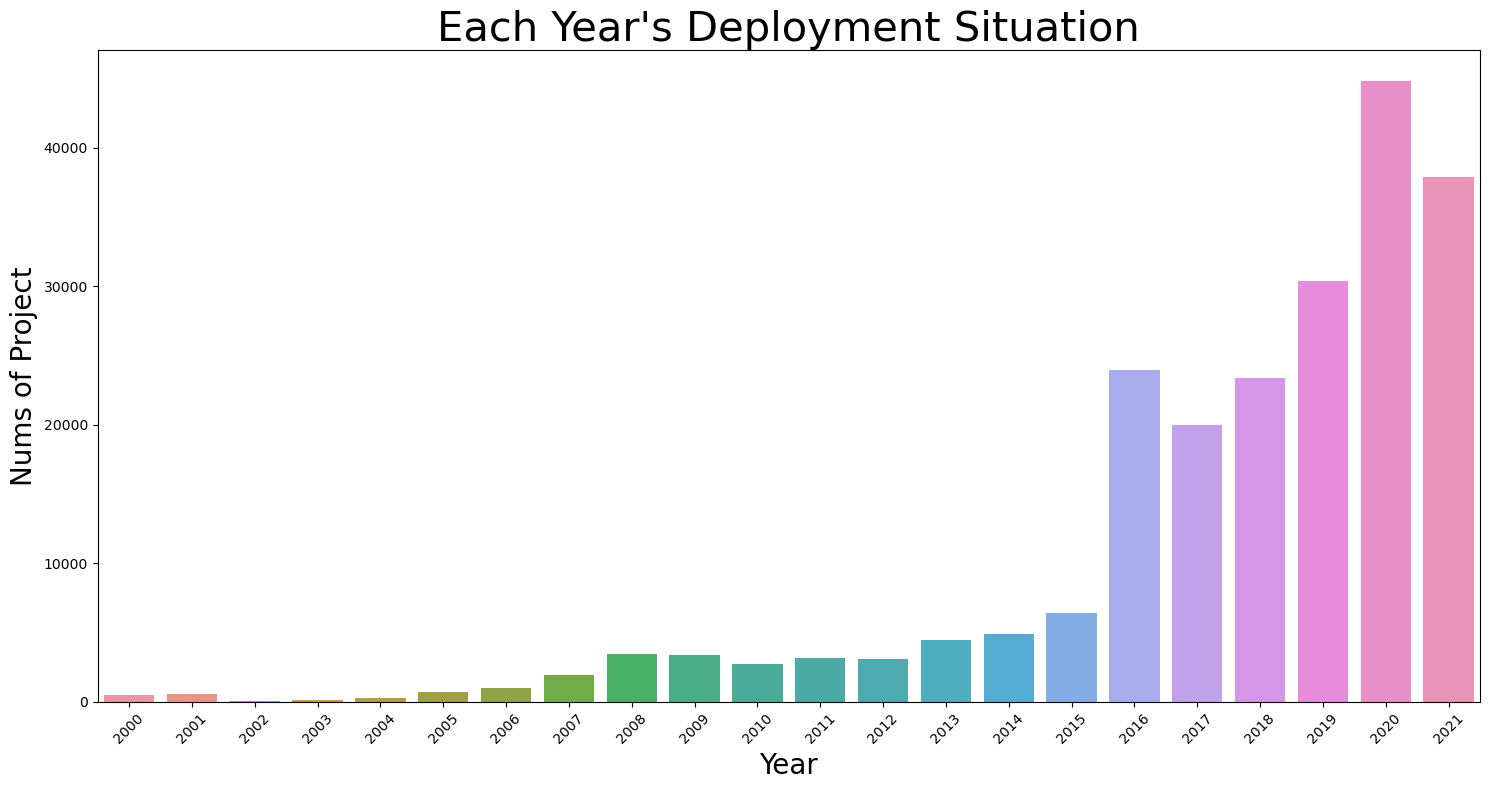

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='Deployment_Year',y='Total_number_of_deployment',data=df1)
plt.xticks(rotation = 45)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Nums of Project',fontsize=20)
plt.title("Each Year's Deployment Situation",fontsize=30)
plt.tight_layout()
plt.show()

## Fund Type Applied State Situation

In [14]:
df2 = """
select Fund_Type, Count(distinct State_Code) as Number_of_State 
from `broadband-data.usac_high_cost.Broadband_block_county_state_num` group by 1 order by 2 DESC;
"""

df2 = client.query(df2).to_dataframe()

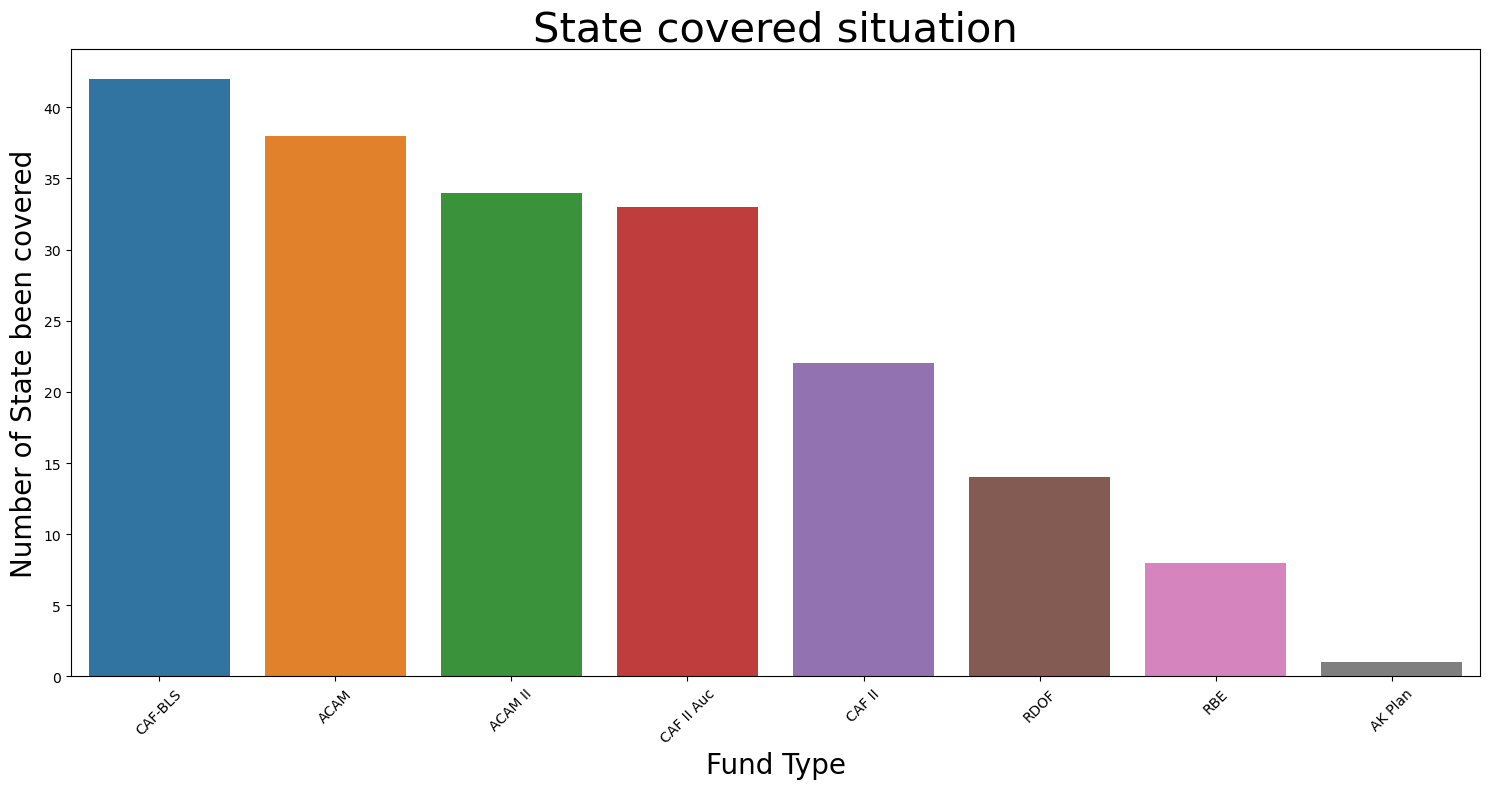

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='Fund_Type',y='Number_of_State',data=df2)
plt.xticks(rotation = 45)
plt.xlabel('Fund Type',fontsize=20)
plt.ylabel('Number of State been covered',fontsize=20)
plt.title("State covered situation",fontsize=30)
plt.tight_layout()
plt.show()

## Fund Deployed Overall Situation

In [16]:
df3 = """select Fund_Type, Sum(Nums) as Total_number_deployed from 
`broadband-data.usac_high_cost.Broadband_block_county_state_num` group by Fund_Type order by 2 DESC;

"""
df3 = client.query(df3).to_dataframe()

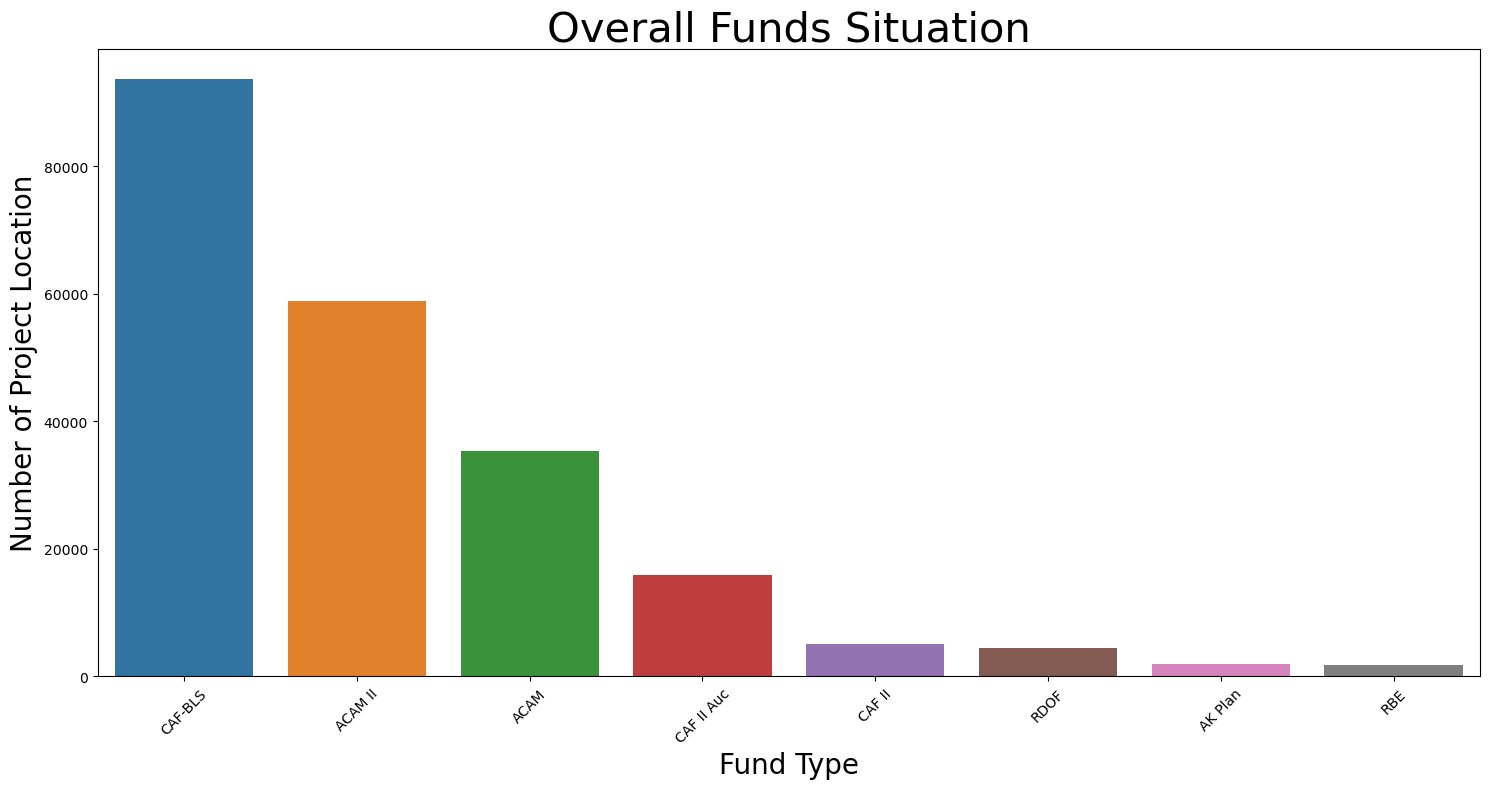

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='Fund_Type',y='Total_number_deployed',data=df3)
plt.xticks(rotation = 45)
plt.xlabel('Fund Type',fontsize=20)
plt.ylabel('Number of Project Location',fontsize=20)
plt.title("Overall Funds Situation",fontsize=30)
plt.tight_layout()
plt.show()

## Detailed Funds Applied to State

### CAF-BLS

In [30]:
df5 ="""
with state as (
  select State, 
  case when char_length(Code)=1 then concat(0,Code)
  else Code
  end as Code
  from `broadband-data.StateInfo.StateCode`
),
joinin as (
  select Fund_Type,
  State,
  sum(Nums) as Total_Number_deployed 
  from `broadband-data.usac_high_cost.Broadband_block_county_state_num`  as a inner join state as b
  on a.State_Code=b.Code
  group by 1,2 
  order by 1,2
)

select State,Total_Number_deployed from joinin where Fund_Type='CAF-BLS' and State!= 'Hawaii' order by 2 DESC;


"""

df5 = client.query(df5).to_dataframe()

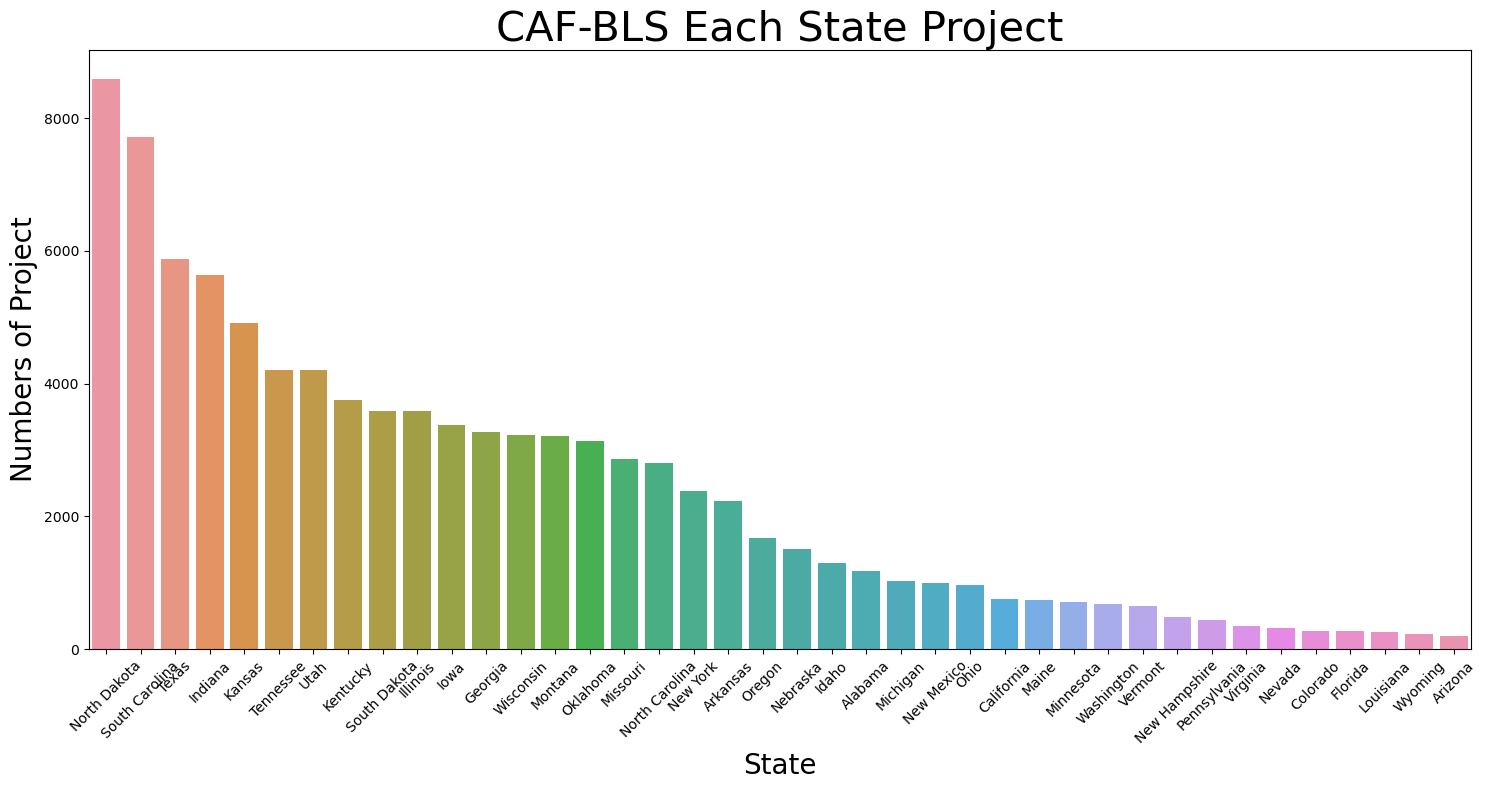

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='State',y='Total_Number_deployed',data=df5)
plt.xticks(rotation = 45)
plt.xlabel('State',fontsize=20)
plt.ylabel('Numbers of Project',fontsize=20)
plt.title("CAF-BLS Each State Project",fontsize=30)
plt.tight_layout()
plt.show()

### ACAM II

In [33]:
df6 ="""
with state as (
  select State, 
  case when char_length(Code)=1 then concat(0,Code)
  else Code
  end as Code
  from `broadband-data.StateInfo.StateCode`
),
joinin as (
  select Fund_Type,
  State,
  sum(Nums) as Total_Number_deployed 
  from `broadband-data.usac_high_cost.Broadband_block_county_state_num`  as a inner join state as b
  on a.State_Code=b.Code
  group by 1,2 
  order by 1,2
)

select State,Total_Number_deployed from joinin where Fund_Type='ACAM II' and State!= 'Hawaii' order by 2 DESC;


"""

df6 = client.query(df6).to_dataframe()

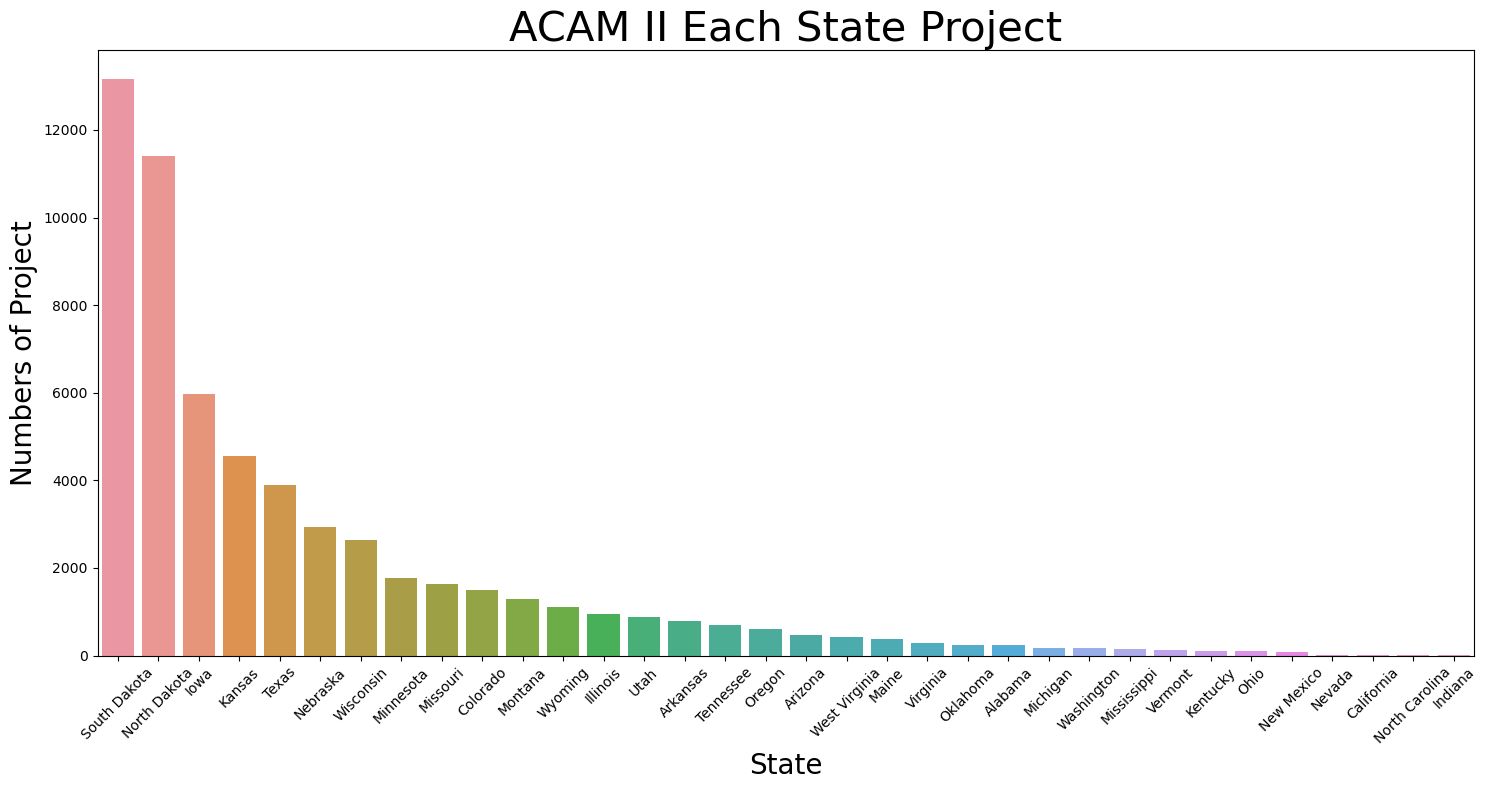

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='State',y='Total_Number_deployed',data=df6)
plt.xticks(rotation = 45)
plt.xlabel('State',fontsize=20)
plt.ylabel('Numbers of Project',fontsize=20)
plt.title("ACAM II Each State Project",fontsize=30)
plt.tight_layout()
plt.show()

# ACAM 

In [23]:
df4 ="""
with state as (
  select State, 
  case when char_length(Code)=1 then concat(0,Code)
  else Code
  end as Code
  from `broadband-data.StateInfo.StateCode`
),
joinin as (
  select Fund_Type,
  State,
  sum(Nums) as Total_Number_deployed 
  from `broadband-data.usac_high_cost.Broadband_block_county_state_num`  as a inner join state as b
  on a.State_Code=b.Code
  group by 1,2 
  order by 1,2
)

select State,Total_Number_deployed from joinin where Fund_Type='ACAM' order by 2 DESC;


"""

df4 = client.query(df4).to_dataframe()

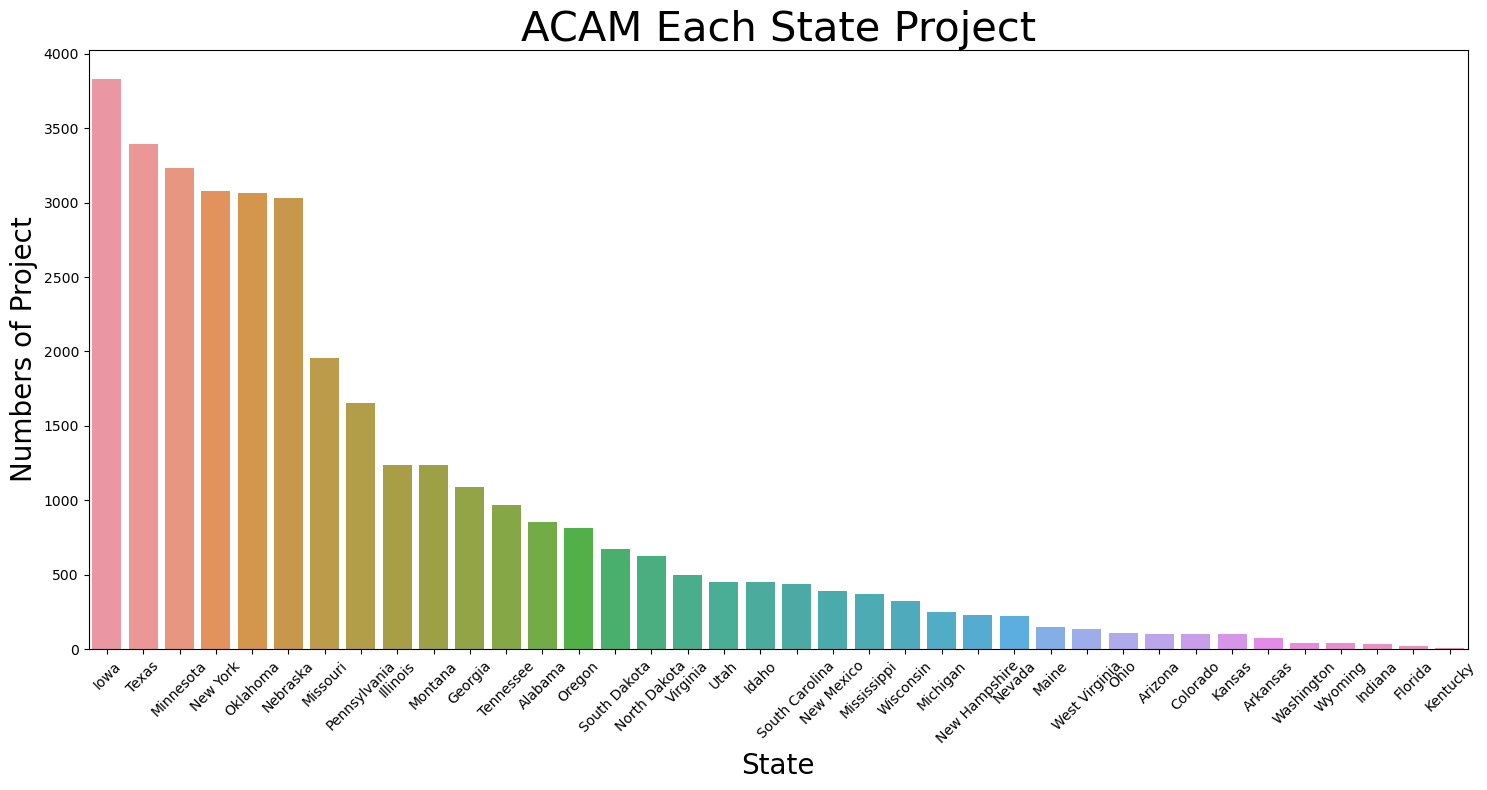

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='State',y='Total_Number_deployed',data=df4)
plt.xticks(rotation = 45)
plt.xlabel('State',fontsize=20)
plt.ylabel('Numbers of Project',fontsize=20)
plt.title("ACAM Each State Project",fontsize=30)
plt.tight_layout()
plt.show()